In [3]:
from sklearn import datasets
import random
import numpy

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


In [48]:
class KMeans:
    def __init__(self, k, distance='euclidienne', iterations=10):
        self.k = k
        self.distance = distance
        self.iterations = iterations
        centroid = []

    def fit(self,X):
        self.centroid = random.sample(list(X),self.k)
        print(self.centroid)
        i = 0
        while i <self.iterations:
            y = []
            for i in range(X.shape[0]):
                distances = []
                for j in range(self.k):
                    if(self.distance == 'euclidienne'):
                        distances.append(numpy.linalg.norm(X[i]-self.centroid[j]))
                    else:
                        distances.append(numpy.linalg.norm(X[i]-self.centroid[j]))

                y.append(distances.index(min(distances)))

            centroidbis = []  
            for cent in range(self.k):
                points = X[numpy.where(numpy.array(y) == cent)]
                centroidbis.append(numpy.mean(points,axis=0))

            if (numpy.array(self.centroid) == numpy.array(centroidbis)).all():
                return 
            else: 
                self.centroid = centroidbis.copy()
                i += 1
                
    def transform(self,X):
        pass
        
    def predict(self,X):
        array = [numpy.linalg.norm(X-centre, axis=1) for centre in self.centroid]
        y = []
        for j in range(len(array[0])):
            liste = [array[i][j] for i in range(len(array))]
            y.append(liste.index(min(liste)))
        return y
        



In [63]:
kmean = KMeans(5,'euclidienne', 10)
kmean.fit(X)

[array([6.1, 3. ]), array([5.6, 2.8]), array([5.1, 2.5]), array([5.8, 2.7]), array([6.4, 2.8])]


In [53]:
import matplotlib.pyplot as plt

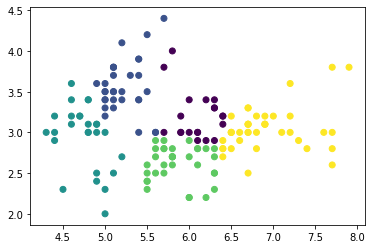

In [64]:
plt.scatter(X[:,0],X[:,1], c=kmean.predict(X))